# 1.0 Treinamento do Lui: DS Novato

## Dados sintéticos

In [18]:
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import tree as tr
from sklearn import metrics as mt

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

In [72]:
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

# Essa funcão serve para criar datasets para treino e teste
x, y = ds.make_classification( n_samples= n_samples,
                        n_features= n_features,
                        n_informative= n_informative,
                        n_redundant= n_redundant ,
                        random_state= random_state )

# Dataset de produção
X, X_prod, y, y_prod = ms.train_test_split(x, y, test_size = 0.2)

In [73]:
# Transformando a resposta em Dataframe
df = pd.DataFrame(x)
df.shape

(20000, 2)

In [74]:
df.head()

,0,1
0,2.022874,0.285346
1,0.549895,0.701021
2,-0.659376,0.116066
3,0.967521,-1.060414
4,-1.796434,-2.093534


## Não há separação dos dados

In [75]:
# Define o modelo
model = tr.DecisionTreeClassifier( max_depth=  38 )
model.fit(X, y)

# Classificação sobre os dados de treinamento
yhat = model.predict( X )
acc = mt.accuracy_score(y, yhat) 

print('Acurácia em cima do treino: {}'.format(acc))

Acurácia em cima do treino: 1.0


## Publicação do Modelo em Produção

In [76]:
yhat_prod = model.predict (X_prod)
acc_prod = acc = mt.accuracy_score(y_prod, yhat_prod) 

print('Acurácia em cima da produção: {}'.format(acc_prod))

Acurácia em cima da produção: 0.84725


## Estratégia Treino-Teste

In [77]:
# Separa os dados em Treinamento e Teste
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state = random_state)

In [78]:
# Modelo treinando com os dados de treinamento
model = tr.DecisionTreeClassifier( max_depth=  38 )
model.fit(X_train, y_train)

# Classificacao sobre os dados de teste
yhat_test = model.predict(X_test)
acc_test = mt.accuracy_score(y_test, yhat_test) 

print('Acurácia em cima do teste: {}'.format(acc_test))

Acurácia em cima do teste: 0.8490625


## Escolha os parâmetros do algoritmo

In [79]:
values = [i for i in range(1, 60)]

test_score = list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth = i)
    model.fit (X_train, y_train)
    
    # Classificacao sobre o teste
    yhat_test = model.predict( X_test )
    acc_test = mt.accuracy_score(y_test, yhat_test)
    
    test_score.append (acc_test)

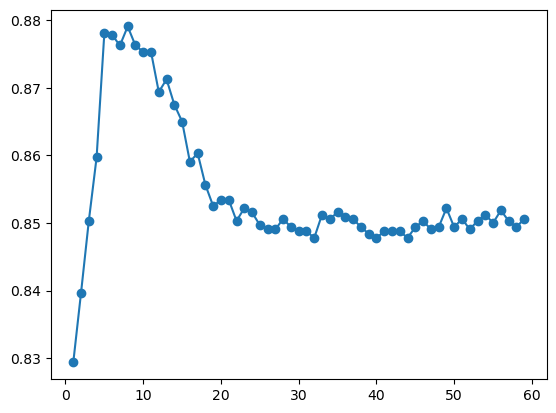

In [80]:
# Vamos plotar os resultados
plt.plot(values, test_score, '-o', label='test')

## Publicação do Algoritmo em Produção

In [81]:
# Modelo treinado
model_last = tr.DecisionTreeClassifier(max_depth = 8)
model_last.fit(np.concatenate((X_train, X_test)),
               np.concatenate((y_train, y_test))
              )

# Classificacao sobre os dados de producao
yhat_prod = model_last.predict ( X_prod )
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print('Acurácia em cima da produção: {}'.format(acc_prod))

Acurácia em cima da produção: 0.888


# 2.0 Estratégia de Treino-Validação-Teste

In [82]:
# Separacao entre Treino e Validação
X_train, X_val, y_train, y_val = ms.train_test_split(X_train, y_train, test_size = 0.2)

# Treino-Teste já é holdout - já é segurar alguém de fora

In [83]:
values = [i for i in range(1, 60)]

val_score = list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth = i)
    model.fit (X_train, y_train)
    
    # Classificacao sobre a validação
    yhat_val = model.predict( X_val )
    acc_val = mt.accuracy_score(y_val, yhat_val)
    
    val_score.append(acc_val)

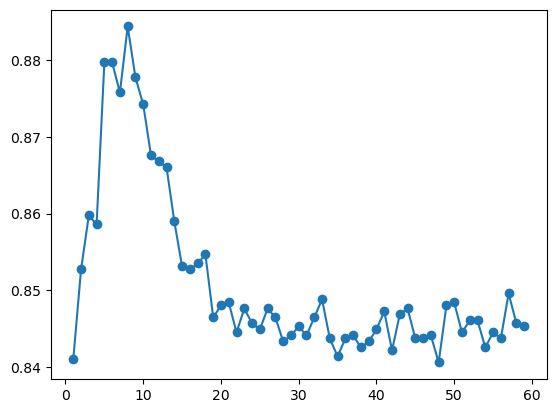

In [58]:
# Vamos plotar os resultados
plt.plot(values, val_score, '-o', label='Validacao')

In [84]:
# Previsão sobre os dados de validação
# Classificacao sobre a validação
model = tr.DecisionTreeClassifier( max_depth = 8)
model.fit (X_train, y_train)

yhat_val = model.predict( X_val )
acc_val = mt.accuracy_score(y_val, yhat_val)

print('Acurácia em cima da produção: {}'.format(acc_val))

Acurácia em cima da produção: 0.873828125


In [85]:
# Modelo treinado sobre training + validation
model_last = tr.DecisionTreeClassifier(max_depth = 7)
model_last.fit(np.concatenate((X_train, X_test)),
               np.concatenate((y_train, y_test))
              )

# Classificacao sobre os dados de teste
yhat_test = model_last.predict( X_test )
acc_test = mt.accuracy_score(y_test, yhat_test)

print('Acurácia em cima do test: {}'.format(acc_test))

Acurácia em cima do test: 0.8990625


In [86]:
# Classificacao sobre os dados de produção
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print('Acurácia em cima do test: {}'.format(acc_prod))

Acurácia em cima do test: 0.88325


Total (100%) -> Treino (80%) e Teste (20%)
Treino (80%) -> Treino (60%) e Validacao (20%)

Treino (60%), Validacao (20%), Teste (20%)

Modelo -> Treino -> Treinar o algoritmo
       -> Validacao -> Encontrar o melhor parametro

Treino (60%) + Validacao (20%) -> Treino (80%)

Modelo + Melhor Parametro + Treino (80%) -> Treino Last

Modelo Last -> Teste (20%) -> Performance de Generalizacao (Report para negócio)

Treino (Treino + validacao ) + Teste -> Producao